<a href="https://colab.research.google.com/github/thayeylolu/cyberbullying/blob/main/notebooks/CountVectorizer_random%20forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [132]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import numpy as np
from sklearn.model_selection import cross_val_score

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import (
    cross_val_score,
    cross_validate,
    train_test_split,
)

%matplotlib inline

## Mount Drive to connect data present in google drive

In [133]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [134]:
np.random.seed(3040)
random.seed(3040)

## Read CSV 

In [135]:
url = '/drive/MyDrive//NLP/train_data.csv'
df = pd.read_csv(url)

### Load information about the Dataset and preview the 10 rows randomly

In [136]:
df.info()
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          47692 non-null  int64 
 1   clean_txt_emoji     47349 non-null  object
 2   cyberbullying_type  47692 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


,Unnamed: 0,clean_txt_emoji,cyberbullying_type
24705,24705,will try that,other_cyberbullying
10588,10588,clue who she harry might was,gender
46499,46499,leaving your impression people the most import...,ethnicity
15331,15331,what way,gender
20280,20280,being christian woman cannot say you did right...,religion
46707,46707,what these people with dyed black hair niggers...,ethnicity
16224,16224,except isn muslim and you idiot,religion
14181,14181,darlingwestallen not gonna apologize for rape ...,gender
14713,14713,think the phrase got raped enter test name her...,gender
14868,14868,fat jokes gay jokes black jokes and rape jokes...,gender


### Data Cleaning

- Strip white spaces in the `clean_txt_emoji` column 
- Drop empty rows and `Unnamed: 0` column
- Select `cyberbullying_type` and `clean_txt_emoji`
- Split the data into test , validate and train dataset that and set a random state for the split
- Check the value count for each classes

In [137]:
df['clean_txt_emoji'] = df['clean_txt_emoji'].str.strip()
df = df.dropna()
df = df.drop(columns = ["Unnamed: 0"])

In [138]:
np.random.seed(3040)
random.seed(3040)

df = df[['cyberbullying_type', 'clean_txt_emoji']]
train, test = train_test_split(df,train_size= 0.70, random_state= 3040)
test['cyberbullying_type'].value_counts()

ethnicity              2491
religion               2444
not_cyberbullying      2371
age                    2338
gender                 2337
other_cyberbullying    2224
Name: cyberbullying_type, dtype: int64

### Encode the labels into numerical labels

In [139]:
classes = df['cyberbullying_type'].unique()
encoder = LabelEncoder()
y = encoder.fit_transform(df['cyberbullying_type'])

### Split train, test and validate data into X and y

In [140]:
X_train, y_train = train.drop(columns=["cyberbullying_type"]), train["cyberbullying_type"]
X_test, y_test = test.drop(columns=["cyberbullying_type"]), test["cyberbullying_type"]

## Define a Count Vectorizer

- Save the train_X data as the corpus to train the vecotrizer on
- Initialize the count vectorizer
- Fit and transformer the train data on the vecotrizer
-  extract feature vectors

In [141]:
corpus_train = X_train['clean_txt_emoji']
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(corpus_train)
feat_names = vectorizer.get_feature_names_out()
feat_names.shape
X_train_vec.shape

(33144, 33382)

## Transform Test Data

- Transformer the validate and test corpus data on the vecotrizer
- extract feature vectors

In [142]:
X_test_vec = vectorizer.transform(X_test['clean_txt_emoji'])
feat_names = vectorizer.get_feature_names_out()
print(X_test_vec.shape)

(14205, 33382)


## Model Selection 

- for every criteria, The function loops over a series of `depth` to find the best hyperparameter to train the decision tree classfier on.

- For each depth, the validation score, train score and model is stored in a dictionary



In [143]:

np.random.seed(3040)
random.seed(3040)
def select_model(train_X, train_y, depths):
  res  = {key:{} for key in ["entropy", "gini"]}

  for criterion in res:
    best_d = None
    best_acc = 0
    for dep in depths :
      tree = RandomForestClassifier(criterion=criterion, max_depth=dep)
      score = cross_val_score(tree, train_X, train_y, cv=5, scoring='accuracy') 
      res[criterion][dep] = {'depth': round(np.mean(score),4)}

  return res

In [144]:
best_model = select_model(X_train_vec , y_train, depths = [5, 7, 11, 15, 20])


## Select the model parameters with highest validation accuracy

In [145]:
entropy_result = max(best_model['entropy'].items(), key=lambda k: k[1].get('depth'))
gini_result = max(best_model['gini'].items(), key=lambda k: k[1].get('depth'))

In [146]:
result = []
if entropy_result[1]['depth'] >= gini_result[1]['depth']:
    result .append(entropy_result)
    result.append['entropy']
else:
    result.append(gini_result)
    result.append('gini')

In [147]:
depth = result[0][0]
val_accuracy = result[0][1]['depth']
criteria = result[1]
val_accuracy

0.7868

## Train the RandomForest with the parameters
- Trains the model on the best hyper parameters
- Predicts the test

In [148]:
# The best performing decision tree was depth 55 with gini criterion so check its confusion matrix
best_forest = RandomForestClassifier(criterion=criteria, max_depth=depth , random_state=3040)
best_forest = best_forest.fit(X_train_vec, y_train)
y_test_predicted = best_forest.predict(X_test_vec)


### Accuracy Score

In [149]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_test_predicted)

acc_score

0.7947201689545934

## Generate a Confusion Matrix

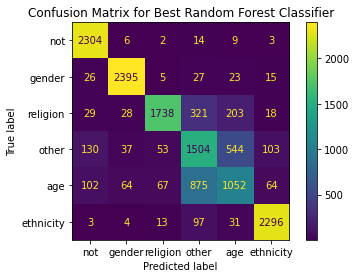

In [151]:
# Generate a more visual representation of the confusion matrix
cm = metrics.confusion_matrix(y_test, y_test_predicted, labels=best_forest.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['not', 'gender', 'religion', 'other', 'age', 'ethnicity'])
disp.plot()
fig
plt.title("Confusion Matrix for Best Random Forest Classifier")
plt.show()